# Explore here

In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, DecisionTreeRegressor
from sklearn.metrics import *
from imblearn.metrics import specificity_score


In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv', sep = ',')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
df.shape

(768, 9)

In [29]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [30]:
df.duplicated().sum()

np.int64(0)

In [31]:
df.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [32]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

Ahora para ver el gráfico de coordenadas paralelas, debemos escalar el dataframe para poder observar la influencia real de cada variable.

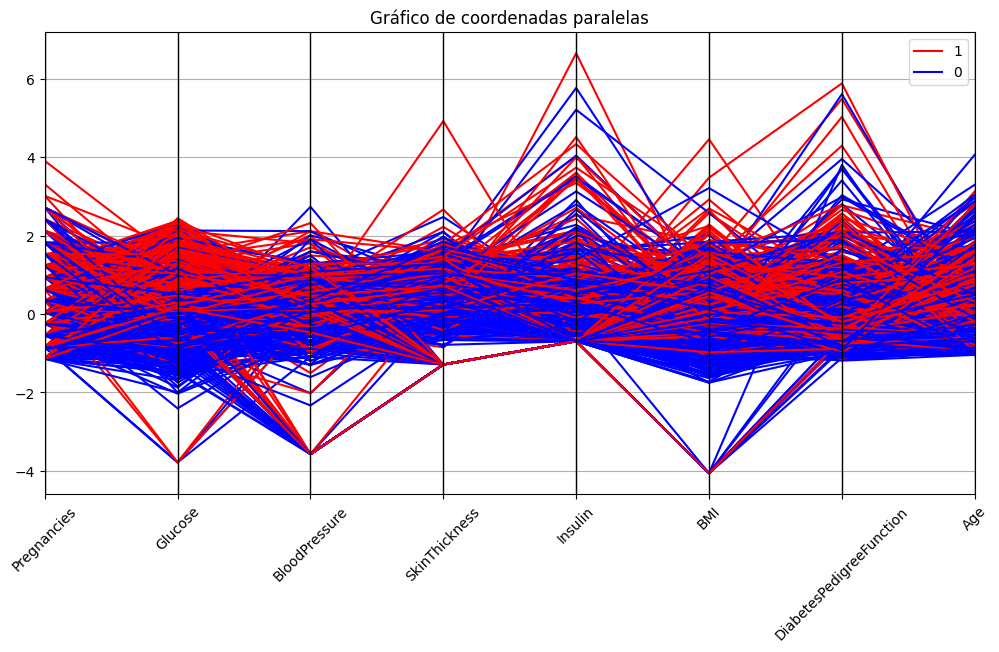

In [35]:
# Creo un nuevo dataframe escalado sin incluir la variable Outcome (var obj)
df_sc = pd.DataFrame(data=StandardScaler().fit_transform(df.drop(['Outcome'], axis=1)), columns=df.columns[:-1])

#Añado la variable Outcome al dataset escalado
df_sc['Outcome'] = df.Outcome

# Aquí creo el gráfico
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(df_sc, 'Outcome', color=['red', 'blue'])
plt.xticks(rotation=45)
plt.title('Gráfico de coordenadas paralelas')
plt.show()

A través de este gráfico no podemos sacar muchas conclusiones, ya que se ve bastante uniforme en todas las variables sin encontrar algún tipode patrón. Por otra parte podemos observar que las variables Insulin, Glucose, BloodPressure, BMI y DiabetesPedigreeFunction tienen algunos valores atípicos.

In [36]:
#Aquí separo las variables independientes de la variable objetivo
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [37]:
#Defino los conjuntos de entrenamineto y de prueba
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [40]:
#divido el conjunto de datos
X_train["Outcome"] = y_train.values
X_test["Outcome"] = y_test.values
X_train.to_csv("../data/processed/clean_train_diabetes.csv", index = False)
X_test.to_csv("../data/processed/clean_test_diabetes.csv", index = False)

### **Creación de los Modelo Decison_Tree**

In [42]:
train_data = pd.read_csv("../data/processed/clean_train_diabetes.csv")
test_data = pd.read_csv("../data/processed/clean_test_diabetes.csv")

In [43]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]

X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

#### Modelo por defecto

In [44]:
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [49]:
y_pred_train = model.predict(X_train)
y_pred_train

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [48]:
y_pred_test = model.predict(X_test)
y_pred_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

Observamos gráficamente el árbol

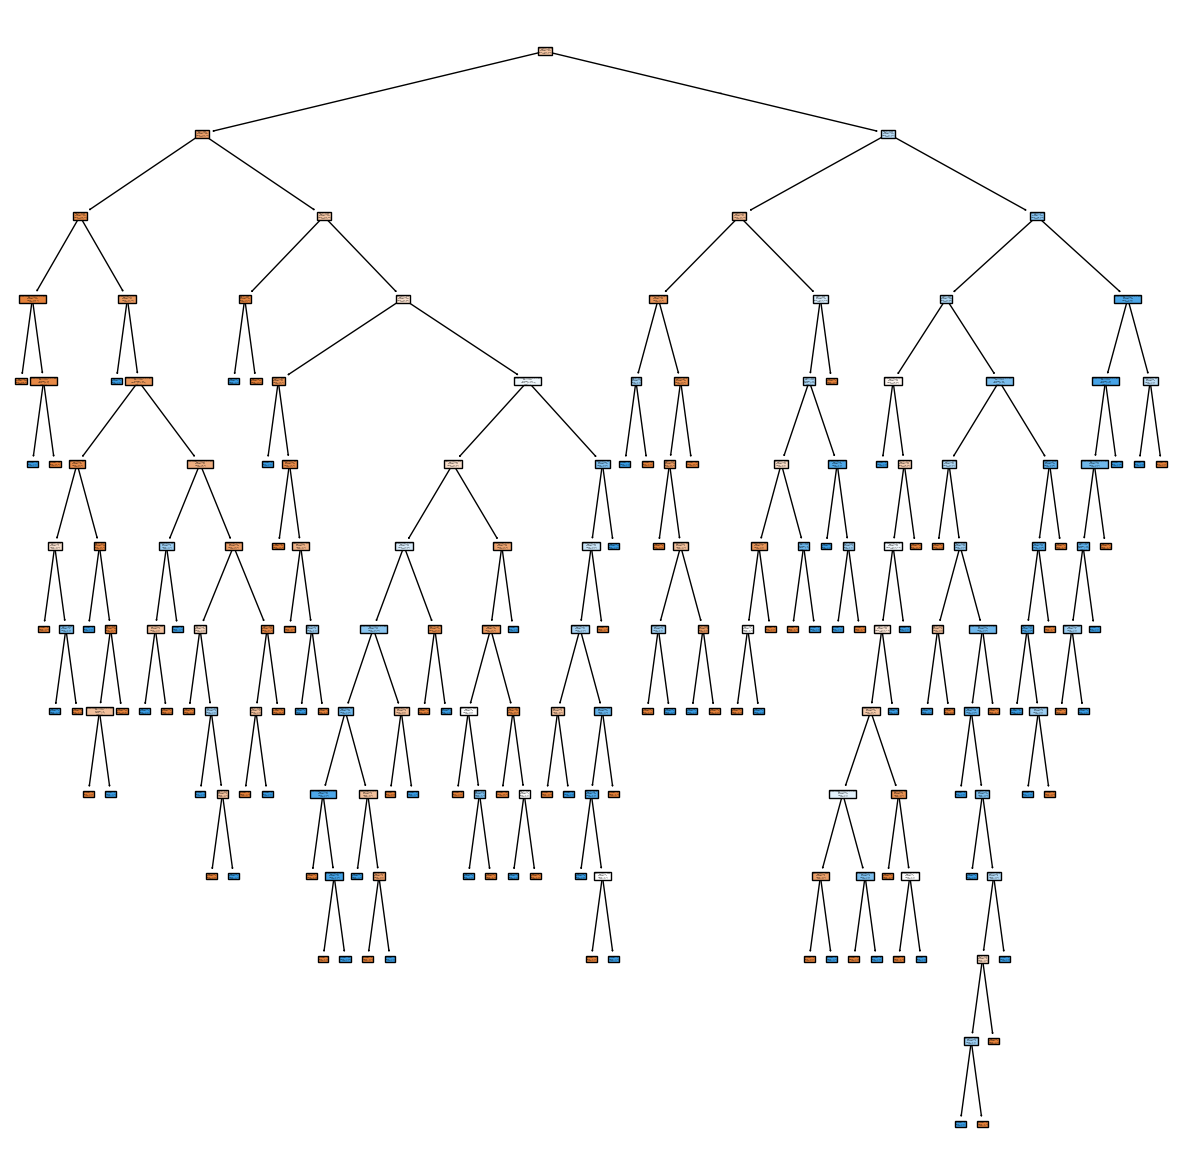

In [47]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

In [53]:
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df

In [54]:
get_metrics(y_train, y_test, y_pred_train, y_pred_test)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,1.000000,1.000000,1.000000,1.000,1.000000,1.000000
Test,0.746753,0.672269,0.742424,0.625,0.727273,0.757576
Diferencia,0.253247,0.327731,0.257576,0.375,0.272727,0.242424


Como vemos el modelo por defecto tiene un sobreajuste alto por lo tanto no es capaz de genearlizar y por ende no predice bien en el conjunto de prueba.

Ahora voy a modificar los parametros del algoritmo para internatr reducir el sobreajuste de los datos de entrenamiento y mejorar las prediciones en el conjunto de prueba

In [57]:
# Modelo personalizado un poco complejo
custom_model = DecisionTreeClassifier(criterion= 'gini', max_depth = 50, min_samples_leaf = 15, max_features = X_train.shape[1]//2 , random_state=42).fit(X_train, y_train)

y_pred_train_custom = custom_model.predict(X_train)
y_pred_test_custom = custom_model.predict(X_test)

In [58]:
get_metrics(y_train, y_test, y_pred_train_custom, y_pred_test_custom)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.820847,0.729064,0.791308,0.766839,0.694836,0.887781
Test,0.740260,0.622642,0.709091,0.647059,0.600000,0.818182
Diferencia,0.080587,0.106423,0.082217,0.119781,0.094836,0.069599


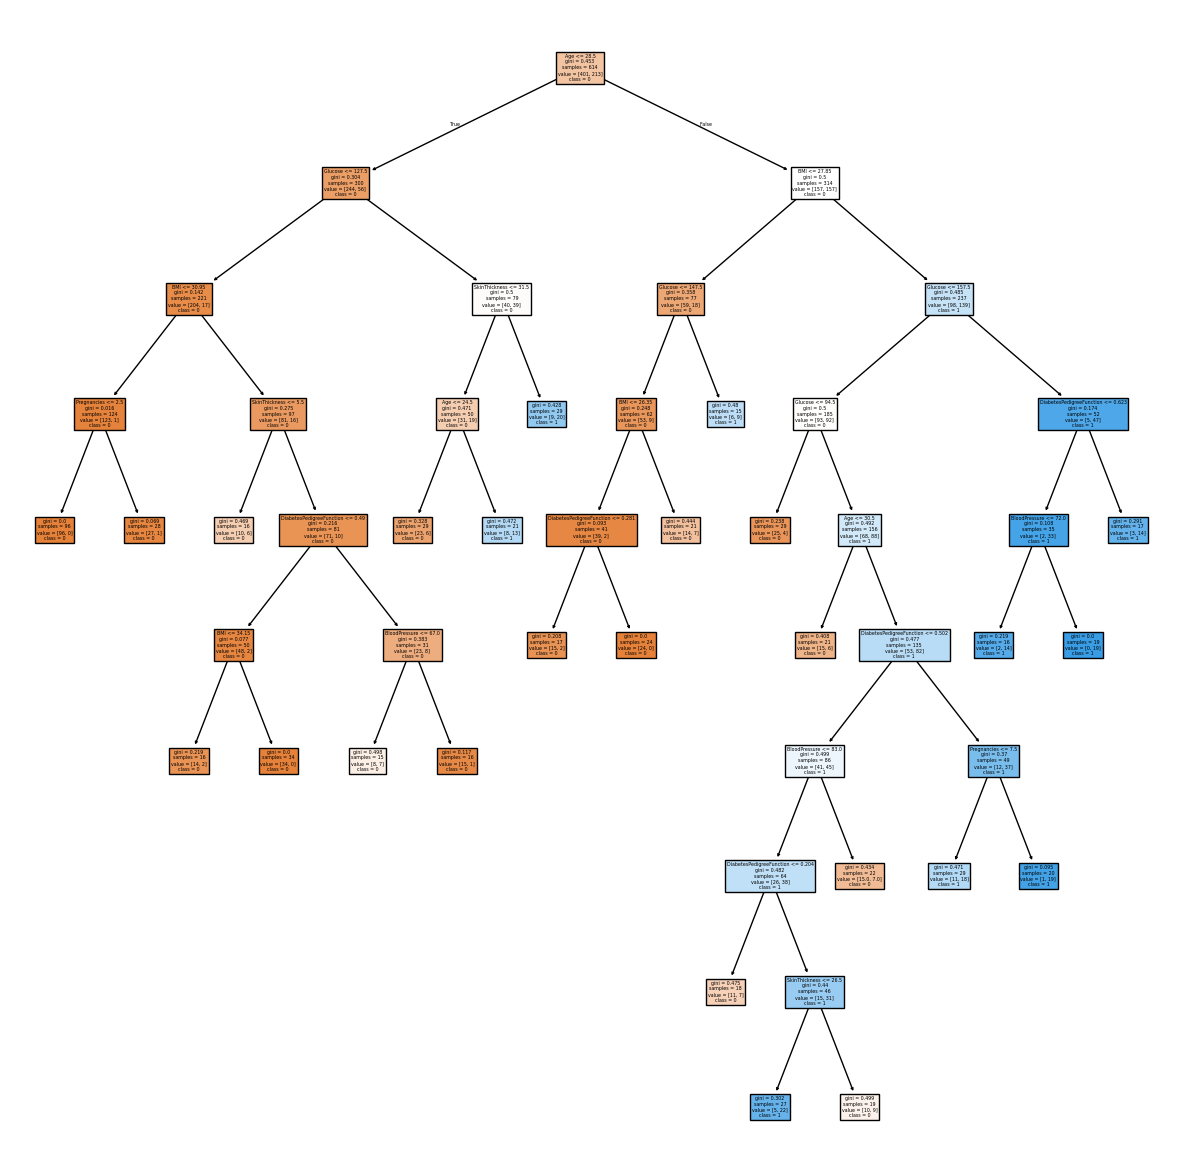

In [59]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(custom_model, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

In [60]:
# Modelo personalizado más simple
custom_model_2 = DecisionTreeClassifier(criterion= 'gini', max_depth = 5, min_samples_leaf = 25, max_features = X_train.shape[1]//2 , random_state=42).fit(X_train, y_train)

y_pred_train_custom_2 = custom_model_2.predict(X_train)
y_pred_test_custom_2 = custom_model_2.predict(X_test)

In [61]:
get_metrics(y_train, y_test, y_pred_train_custom_2, y_pred_test_custom_2)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.770358,0.600567,0.706432,0.757143,0.497653,0.915212
Test,0.740260,0.600000,0.696970,0.666667,0.545455,0.848485
Diferencia,0.030099,0.000567,0.009463,0.090476,-0.047802,0.066727


## Optimizo los hiperparámetros usando GridSearchCV

In [101]:
model_optimizado = DecisionTreeClassifier(random_state=42)

# Defino los hiperparámetros a probar en GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],  # Función de medida de la calidad de la división
    'max_depth': [10, 20, 30, 40],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras necesarias para dividir un nodo
    'min_samples_leaf': [1, 10, 20],  # Número mínimo de muestras necesarias en un nodo hoja
    'max_features': ['sqrt', 'log2', X_train.shape[1]//2]  # Número de características a considerar al buscar la mejor división
}

In [102]:
grid_search = GridSearchCV(estimator=model_optimizado, param_grid=param_grid, cv=10, scoring = 'accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 'log2', 4],
                         'min_samples_leaf': [1, 10, 20],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [103]:
best_model = grid_search.best_estimator_

y_pred_train_best_model = best_model.predict(X_train)
y_pred_test_best_model = best_model.predict(X_test)

print(best_model)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=4,
                       min_samples_leaf=20, random_state=42)


In [104]:
get_metrics(y_train, y_test, y_pred_train_best_model, y_pred_test_best_model)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.802932,0.705596,0.774291,0.732323,0.680751,0.867830
Test,0.759740,0.672566,0.744444,0.655172,0.690909,0.797980
Diferencia,0.043191,0.033030,0.029846,0.077151,-0.010158,0.069851


Aunque hemos mejorado poco el modelo se ha podido optimizar un 1% el la métrica de accuracy respecto al modelo default

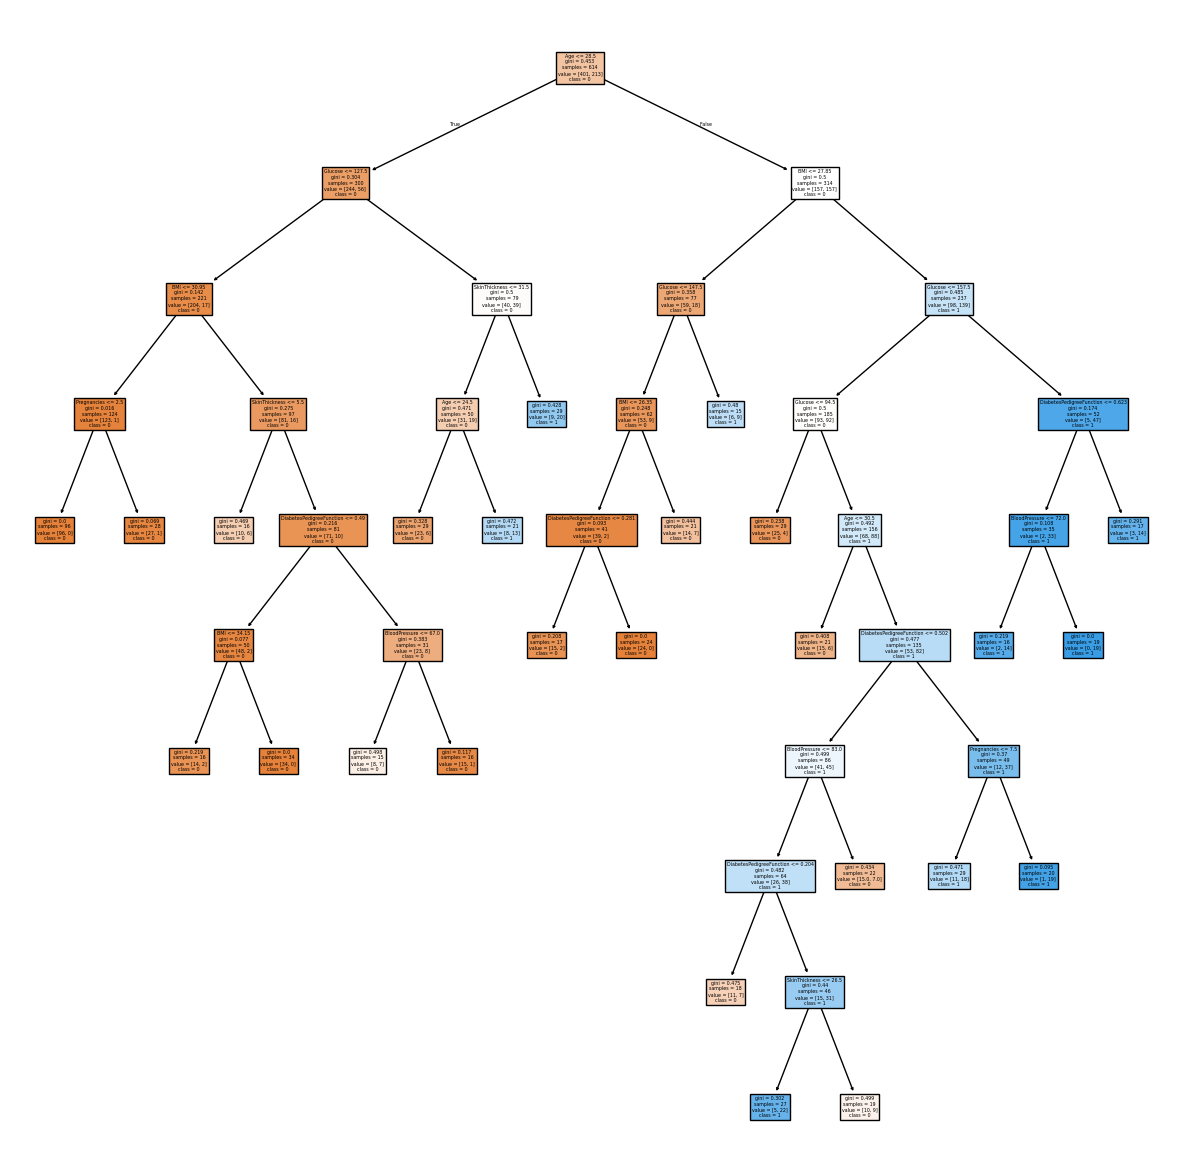

In [105]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(custom_model, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

In [107]:
#Almaceno el modelo
from pickle import dump

dump(best_model, open("../models/tree_classifier_crit-entro_maxdepth-10_maxfeat-4_mins_leaf-20_42.sav", "wb"))